In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.metrics import accuracy_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load Train Data

In [37]:
# Load Train dataset
train_data = pd.read_csv('mnist_train.csv')
train_data.shape

(60000, 785)

### Load Test Data

In [38]:
# Load Test dataset
test_data = pd.read_csv('mnist_test.csv')
test_data.shape

(10000, 785)

### Visualize Some Digits

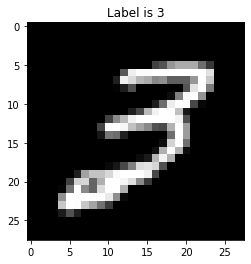

In [11]:
# Which item to show
ITEM_TO_SHOW = 561

# The first column is the label
label = train_data.iloc[ITEM_TO_SHOW, 0]

# The rest of columns are pixels
pixels = train_data.iloc[ITEM_TO_SHOW, 1:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

### Separate Labels

In [39]:
# Separate train labels
train_labels = train_data.label

del train_data['label']

# Transform train labels to classes for cross_entropy
train_labels = pd.get_dummies(train_labels)

# Separate test labels
test_labels = test_data.label

del test_data['label']

### Scale Data

In [40]:
# Scale data to 0..1
train_data = train_data / 255.
test_data = test_data / 255.

### Model Creation

In [55]:
kristofari = Sequential()

kristofari.add(Dense(800, input_dim=784))
kristofari.add(Activation('relu'))
kristofari.add(Dense(10))
kristofari.add(Activation('softmax'))

kristofari.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
kristofari.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 800)               628000    
_________________________________________________________________
activation_7 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                8010      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [56]:
%%time

# Required constants
MINIBATCH_SIZE = 64
NUM_OF_EPOCHS = 3

history = kristofari.fit(train_data, train_labels, batch_size=MINIBATCH_SIZE, epochs=NUM_OF_EPOCHS, verbose=1)

Epoch 1/3
60000/60000 [==============================] - 6s 100us/step - loss: 0.2102 - accuracy: 0.9383
Epoch 2/3
60000/60000 [==============================] - 6s 95us/step - loss: 0.0821 - accuracy: 0.9747
Epoch 3/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.0516 - accuracy: 0.9839
CPU times: user 39.9 s, sys: 6.8 s, total: 46.7 s
Wall time: 17.9 s


### Let's Predict!

In [63]:
# Here our neural network makes prediction on _unseen_ test data
prediction = kristofari.predict(test_data)

# Transform a little bit
prediction = np.apply_along_axis(argmax, 1, prediction)

# Finally print the accuracy
final_score = accuracy_score(test_labels, prediction)
print(f"Correctly predicted in {final_score:.2%} cases out of {test_labels.shape[0]} samples!")

Correctly predicted in 97.77% cases out of 10000 samples!
